In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
beeFile1 = pd.read_csv('./data/vHoneyNeonic_v02.csv')
beeFile2 = pd.read_csv('./data/vHoneyNeonic_v03.csv')

In [ ]:
beeFile1.columns

In [ ]:
beeFile2.columns

In [3]:
beeFile2.drop('FIPS',axis=1,inplace=True)

In [ ]:
beeFile2.columns

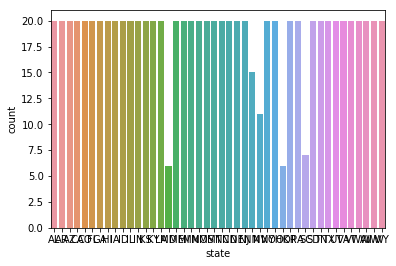

In [81]:
sns.countplot(data=beeFile1,x='state')

In [5]:
beeData = pd.concat([beeFile2,beeFile1])

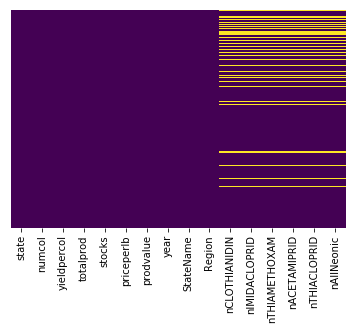

In [6]:
sns.heatmap(beeData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
beeData.dropna(inplace=True) # hago drop porque si es null, todas las

In [34]:
beeData.head()

state   numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue  \
0    AL  14000.0           66   924000.0   92000.0        0.81   748000.0   
1    AL  15000.0           64   960000.0   96000.0        0.87   835000.0   
2    AL  16000.0           58   928000.0   28000.0        0.69   640000.0   
7    AL  11000.0           56   616000.0  209000.0        1.49   918000.0   
8    AL  11000.0           72   792000.0  230000.0        1.21   958000.0   

   year StateName Region  nCLOTHIANIDIN  nIMIDACLOPRID  nTHIAMETHOXAM  \
0  1997   Alabama  South            0.0         6704.8            0.0   
1  1996   Alabama  South            0.0          371.6            0.0   
2  1995   Alabama  South            0.0          716.5            0.0   
7  2007   Alabama  South         7696.2         3258.1         4149.6   
8  2006   Alabama  South          680.0         4230.2         5371.6   

   nACETAMIPRID  nTHIACLOPRID  nAllNeonic  
0           0.0           0.0      6704.8  
1           0.0           0.0       371.6  
2           0.0           0.0       716.5  
7           0.0           0.0     15103.9  
8           0.0           0.0     10281.8

### Visualización de datos

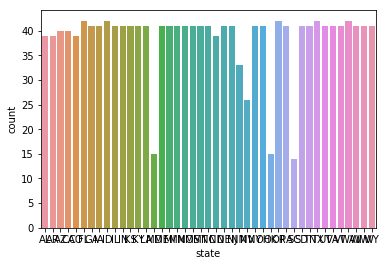

In [8]:
sns.countplot(x='state',data=beeData)

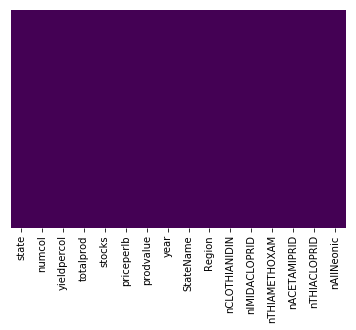

In [9]:
sns.heatmap(beeData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#sns.pairplot(beeData)

In [10]:
beeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 824
Data columns (total 16 columns):
state            1656 non-null object
numcol           1656 non-null float64
yieldpercol      1656 non-null int64
totalprod        1656 non-null float64
stocks           1656 non-null float64
priceperlb       1656 non-null float64
prodvalue        1656 non-null float64
year             1656 non-null int64
StateName        1656 non-null object
Region           1656 non-null object
nCLOTHIANIDIN    1656 non-null float64
nIMIDACLOPRID    1656 non-null float64
nTHIAMETHOXAM    1656 non-null float64
nACETAMIPRID     1656 non-null float64
nTHIACLOPRID     1656 non-null float64
nAllNeonic       1656 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 259.9+ KB


In [ ]:
sns.pairplot(beeData[['nAllNeonic', 'numcol', 'priceperlb','prodvalue','state','stocks','totalprod','year','yieldpercol']])

In [12]:
corr = beeData.corr()


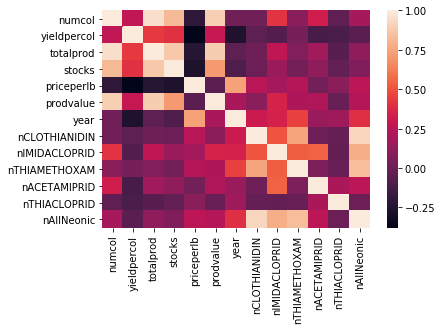

In [13]:
sns.heatmap(corr)

In [14]:
beeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 824
Data columns (total 16 columns):
state            1656 non-null object
numcol           1656 non-null float64
yieldpercol      1656 non-null int64
totalprod        1656 non-null float64
stocks           1656 non-null float64
priceperlb       1656 non-null float64
prodvalue        1656 non-null float64
year             1656 non-null int64
StateName        1656 non-null object
Region           1656 non-null object
nCLOTHIANIDIN    1656 non-null float64
nIMIDACLOPRID    1656 non-null float64
nTHIAMETHOXAM    1656 non-null float64
nACETAMIPRID     1656 non-null float64
nTHIACLOPRID     1656 non-null float64
nAllNeonic       1656 non-null float64
dtypes: float64(11), int64(2), object(3)
memory usage: 259.9+ KB


In [15]:
state = pd.get_dummies(beeData['state'],drop_first=True) # drop_first sirve para que no ponga dos columnas!
region = pd.get_dummies(beeData['Region'],drop_first=True)


In [16]:
cleanedData = beeData.drop(['state','year','StateName','Region'],axis=1,inplace=False)

In [17]:
train = pd.concat([cleanedData,state,region],axis=1)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 824
Data columns (total 57 columns):
numcol           1656 non-null float64
yieldpercol      1656 non-null int64
totalprod        1656 non-null float64
stocks           1656 non-null float64
priceperlb       1656 non-null float64
prodvalue        1656 non-null float64
nCLOTHIANIDIN    1656 non-null float64
nIMIDACLOPRID    1656 non-null float64
nTHIAMETHOXAM    1656 non-null float64
nACETAMIPRID     1656 non-null float64
nTHIACLOPRID     1656 non-null float64
nAllNeonic       1656 non-null float64
AR               1656 non-null uint8
AZ               1656 non-null uint8
CA               1656 non-null uint8
CO               1656 non-null uint8
FL               1656 non-null uint8
GA               1656 non-null uint8
IA               1656 non-null uint8
ID               1656 non-null uint8
IL               1656 non-null uint8
IN               1656 non-null uint8
KS               1656 non-null uint8
KY               1656

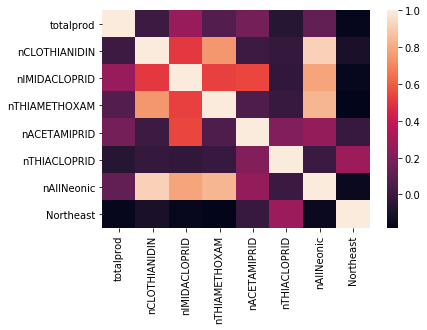

In [20]:
corr1 = train[['totalprod','nCLOTHIANIDIN','nIMIDACLOPRID','nTHIAMETHOXAM','nACETAMIPRID','nTHIACLOPRID','nAllNeonic','Northeast']].corr()
sns.heatmap(corr1)

In [21]:
from sklearn.model_selection import train_test_split

In [46]:
train.head()

numcol  yieldpercol  totalprod    stocks  priceperlb  prodvalue  \
0  14000.0           66   924000.0   92000.0        0.81   748000.0   
1  15000.0           64   960000.0   96000.0        0.87   835000.0   
2  16000.0           58   928000.0   28000.0        0.69   640000.0   
7  11000.0           56   616000.0  209000.0        1.49   918000.0   
8  11000.0           72   792000.0  230000.0        1.21   958000.0   

   nCLOTHIANIDIN  nIMIDACLOPRID  nTHIAMETHOXAM  nACETAMIPRID  ...   UT  VA  \
0            0.0         6704.8            0.0           0.0  ...    0   0   
1            0.0          371.6            0.0           0.0  ...    0   0   
2            0.0          716.5            0.0           0.0  ...    0   0   
7         7696.2         3258.1         4149.6           0.0  ...    0   0   
8          680.0         4230.2         5371.6           0.0  ...    0   0   

   VT  WA  WI  WV  WY  Northeast  South  West  
0   0   0   0   0   0          0      1     0  
1   0   0   0   0   0          0      1     0  
2   0   0   0   0   0          0      1     0  
7   0   0   0   0   0          0      1     0  
8   0   0   0   0   0          0      1     0  

[5 rows x 57 columns]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['totalprod','nAllNeonic'],axis=1), 
                                                    train['totalprod'], test_size=0.30, 
                                                    random_state=101)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm = LinearRegression()

In [69]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
# print the intercept
print(lm.intercept_)

-3576264.7244480075


In [71]:
### Predicción de datos

In [72]:
predictions = lm.predict(X_test)

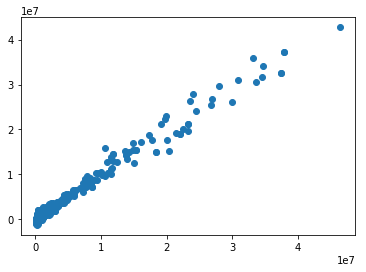

In [80]:
plt.scatter(y_test,predictions)

/home/alexhuang05/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


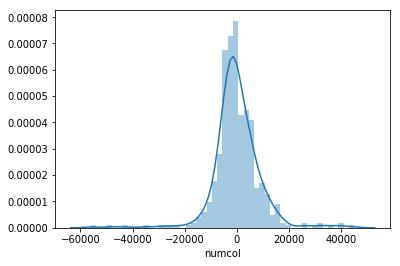

In [63]:
sns.distplot((y_test-predictions),bins=50);

In [64]:
from sklearn import metrics

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5804.513553260532
MSE: 81340779.55036713
RMSE: 9018.912326348845
